# SVM NO LINEAL

### XOR DATA

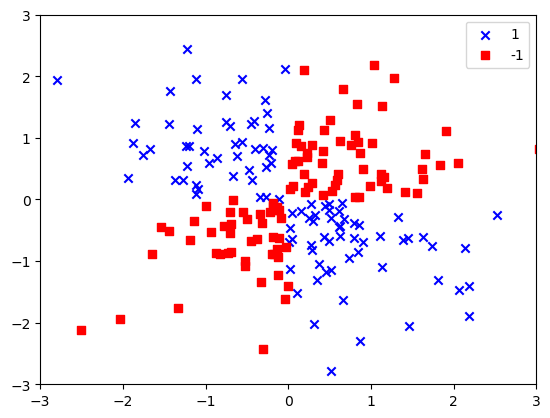

In [3]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
x_xor=np.random.randn(200,2)
y_xor=np.logical_xor(x_xor[:,0]>0,x_xor[:,1]>0)
y_xor= np.where(y_xor,1,-1)
plt.scatter(x_xor[y_xor==1,0],x_xor[y_xor==1,1],c='b',marker='x',label='1')
plt.scatter(x_xor[y_xor==-1,0],x_xor[y_xor==-1,1],c='r',marker='s',label='-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.show()

In [5]:
#Kernel rbf para clasificacion no lineal
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train,X_test,y_train,y_test=train_test_split(x_xor,y_xor,test_size=0.3,random_state=1)
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

svc=SVC(kernel='rbf',random_state=1,gamma=0.1,C=10)
svc.fit(X_train,y_train)
predicts=svc.predict(X_test)

In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_region(X,y,classifier,test_idx=None,resolution=0.02):
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max =X[:,0].min()- 1,X[:,0].max()+1
    x2_min, x2_max =X[:,1].min()- 1,X[:,1].max()+1
    xx1,xx2 =np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y== cl,0],y=X[y==cl,1],
                    alpha=0.8,c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolors='black')
    
    if test_idx:
        X_test,y_test =X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='white',edgecolors='black',alpha=0.3,
                    linewidths=1,marker='o',s=100,label='test_set')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_30768\3759836012.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y== cl,0],y=X[y==cl,1],


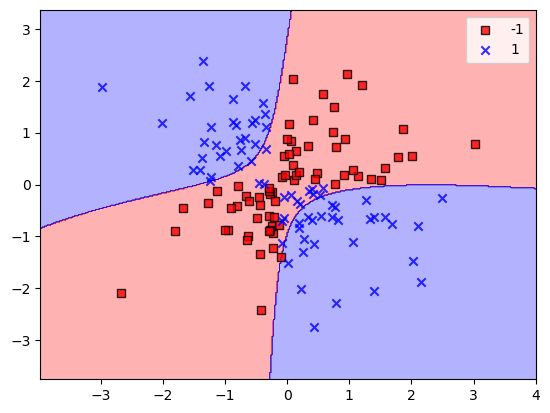

In [7]:
plot_decision_region(X_train,y_train,classifier=svc)
plt.legend(loc='best')
plt.show()

#### IRIS DATA

C:\Users\Usuario\AppData\Local\Temp\ipykernel_30768\3759836012.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y== cl,0],y=X[y==cl,1],


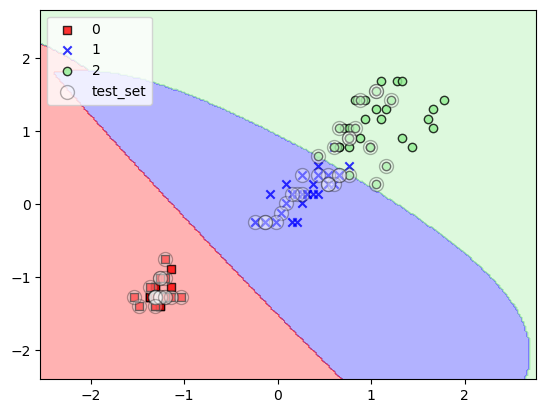

In [20]:
from sklearn import datasets

iris=datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target
sc=StandardScaler()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
svc=SVC(kernel='rbf',random_state=1,gamma=0.2,C=1.0)
svc.fit(X_train,y_train)
predicts=svc.predict(X_test)
plot_decision_region(X_train,y_train,classifier=svc,test_idx=range(55,105))
plt.legend(loc='best')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_30768\3759836012.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y== cl,0],y=X[y==cl,1],


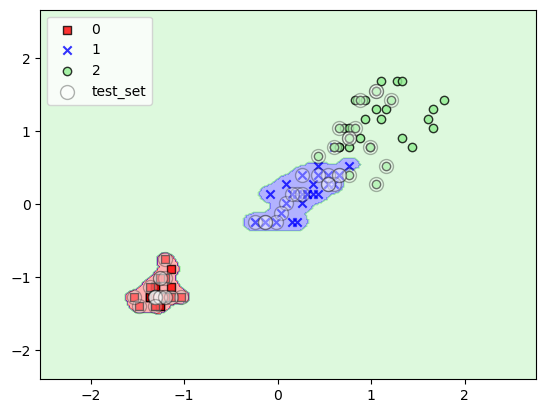

In [21]:
svc=SVC(kernel='rbf',random_state=1,gamma=100,C=1.0)
svc.fit(X_train,y_train)
predicts=svc.predict(X_test)
plot_decision_region(X_train,y_train,classifier=svc,test_idx=range(55,105))
plt.legend(loc='best')
plt.show()